In [119]:
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams

In [120]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../data")
df = pd.read_csv(os.path.join(output_dir, "figlet1601645333.900377_1601652549.075699.csv"))
#df = df.iloc[2:]
df.head()

,Time,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,2020-10-02 15:29:23.900,0.132438,0.000000,0.000000,0.000000,0.021410,8956.493822,15676.529352,1.0,31.0,0.104594,6.0,53.673886,1.240458e+10,35.239334
1,2020-10-02 15:29:38.900,0.135519,0.005087,1019.146240,193184.831716,0.047255,15993.137047,23897.630198,1.0,171.0,0.104342,6.0,53.673886,1.240458e+10,36.494526
2,2020-10-02 15:29:53.900,0.135519,0.006489,910.222222,236475.733333,0.047255,23113.200000,37398.866667,1.0,311.0,0.103601,6.0,13.516667,1.240458e+10,36.494526
3,2020-10-02 15:30:08.900,0.505468,0.006578,910.222222,252950.755556,0.047255,24030.088889,44573.133333,1.0,451.0,0.107709,6.0,13.516667,1.240458e+10,37.307712
4,2020-10-02 15:30:38.900,0.507775,0.002667,2275.555556,101307.733333,0.072956,25390.377778,64516.422222,1.0,560.0,0.109099,6.0,11.227778,1.240458e+10,37.307712


In [121]:
df = df.drop(['totalmemoryUtilization','totalmemory', 'totalcpu','diskio', 'totalcpuUtilization' ], axis=1)

In [122]:
df["diskioRead"] = df["diskioRead"]/1000
df["diskioWritten"] = df["diskioWritten"]/1000
df["networkReceived"] = df["networkReceived"]/1000
df["networkTransmitted"] = df["networkTransmitted"]/1000
df["requests"] = df["requests"]/1000

In [123]:
df.columns = ["Time", "CPU Util. (in percent)", "Disk I/O Read (thosands)",
              "Disk I/O Write (thosands)",
              "Memory Util. (in percent)",
             "Network Reciv. (thosands)",
             "Network Sent (thosands)",
             "Replicas ",
             "Requests (Thousands) ",
             "Response Time (in seconds) "]

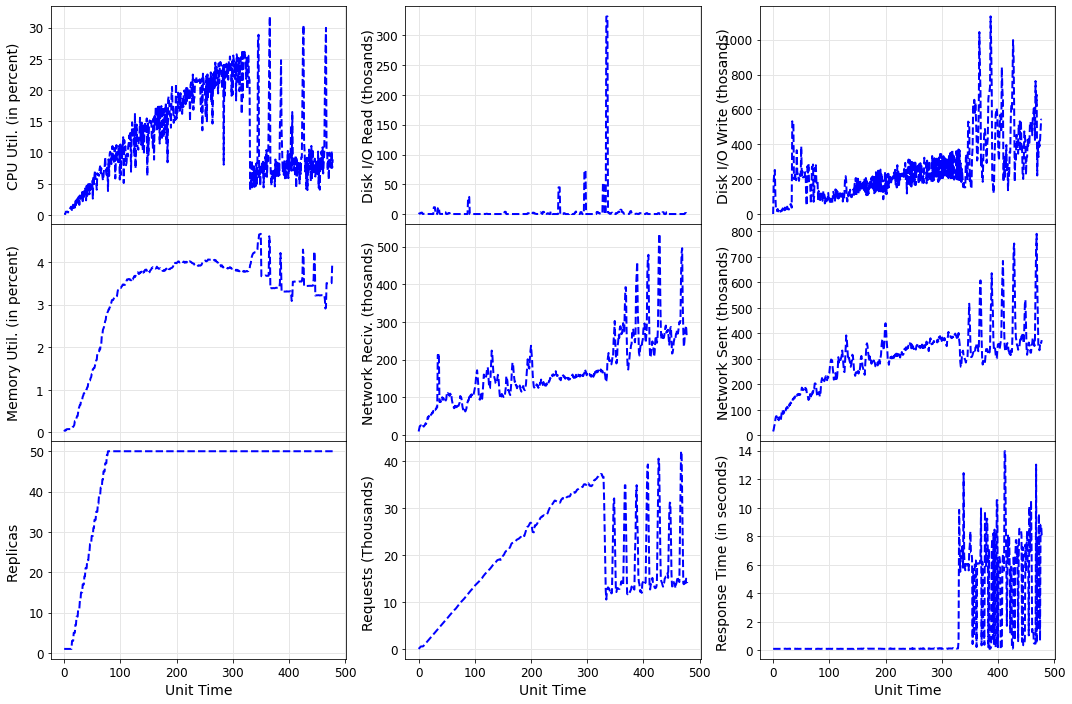

In [124]:
rcParams['figure.figsize'] = 18, 12
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
ax = []

fig, axs = plt.subplots(3, 3, sharex=True)
plot_array = "26"
for col, ax in zip(range(1,len(df.columns)), axs.flatten()):
    ax.plot(df.index,df[df.columns[col]], linestyle='--', linewidth=2.0, color="blue")
    ax.set(xlabel='Unit Time', ylabel=df.columns[col])
    ax.grid(axis="both", color="0.9", linestyle='-', linewidth=1.0)
    ax.get_yaxis().set_label_coords(-0.10, 0.5)
    #ax.xaxis.set_major_formatter(plt.NullFormatter())
#fig.delaxes(axs[3][2])
#fig.delaxes(axs[3][3])
plt.subplots_adjust(hspace=.0)
fig.show()
plt.savefig('sample.pdf',bbox_inches = 'tight',pad_inches = 0)

In [6]:
df_t = pd.DataFrame()

In [26]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*(df['totalcpu']*0.67))/100                    
df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']

In [27]:
train_dataset = df_t.sample(frac=1, random_state=0)

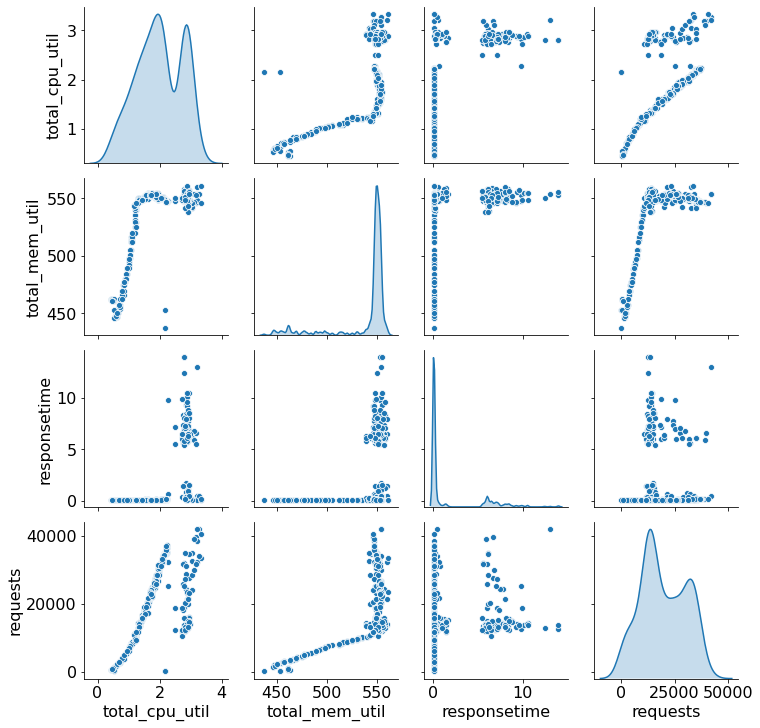

In [28]:
sns.pairplot(train_dataset[['total_cpu_util', 'total_mem_util', 'responsetime', 'requests']], diag_kind='kde')